# <p style="padding:10px;background-color:#754527 ;margin:0;color:#E2EEF3;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Predicting Student Percentage Scores based on Study Hours 💻</p>

![](https://www.kindpng.com/picc/m/242-2423295_online-exam-system-call-centre-cartoon-gif-hd.png)

This task involves regression, aiming to forecast a student's percentage score using their study hours as a predictor. The dataset comprises two columns: "Hours," denoting the hours of study, and "Scores," representing the resulting percentage scores in exams.


**Dataset: The provided data is a subset illustrating pairs of study hours and corresponding percentage scores.**

**Objective: Develop a model to anticipate a student's percentage score based on their study hours.**


# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline



# **Load The Dataset**

In [2]:
# Load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

# Display the first few rows of the dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Get information about the dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# **Explore The Dataset**

In [4]:
# Descriptive statistics of the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Shape of the dataset (number of rows and columns)

df.shape

(25, 2)

In [6]:
# Check for null values in the dataset

df.isnull().sum()


Hours     0
Scores    0
dtype: int64

**There are no null values in the dataset.**

# **Exploratory Data Analysis**

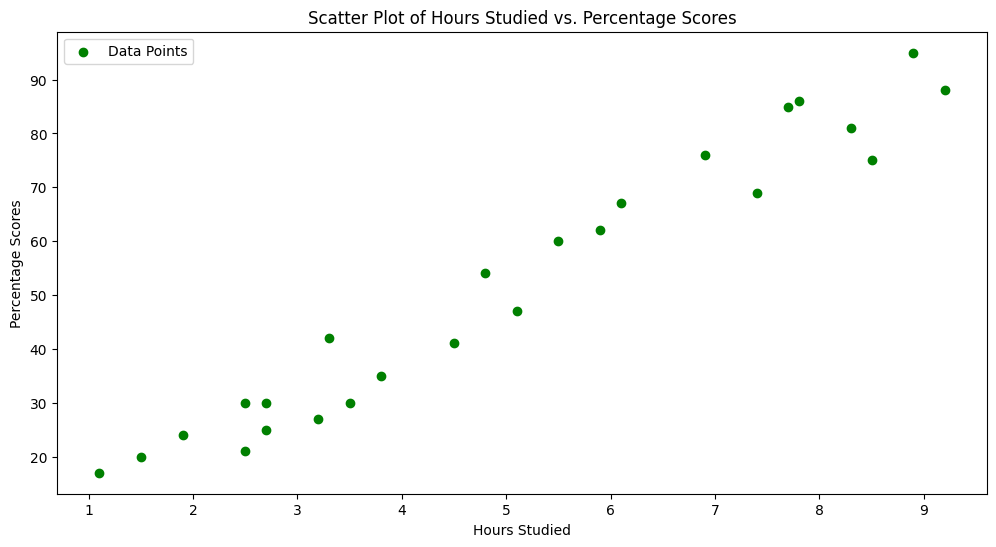

In [7]:
# create a scatter plot
plt.figure(figsize=(12,6))
plt.scatter(df['Hours'],df['Scores'],c='green',marker='o',label='Data Points')
plt.title('Scatter Plot of Hours Studied vs. Percentage Scores')
plt.xlabel("Hours Studied")
plt.ylabel('Percentage Scores')
plt.legend()




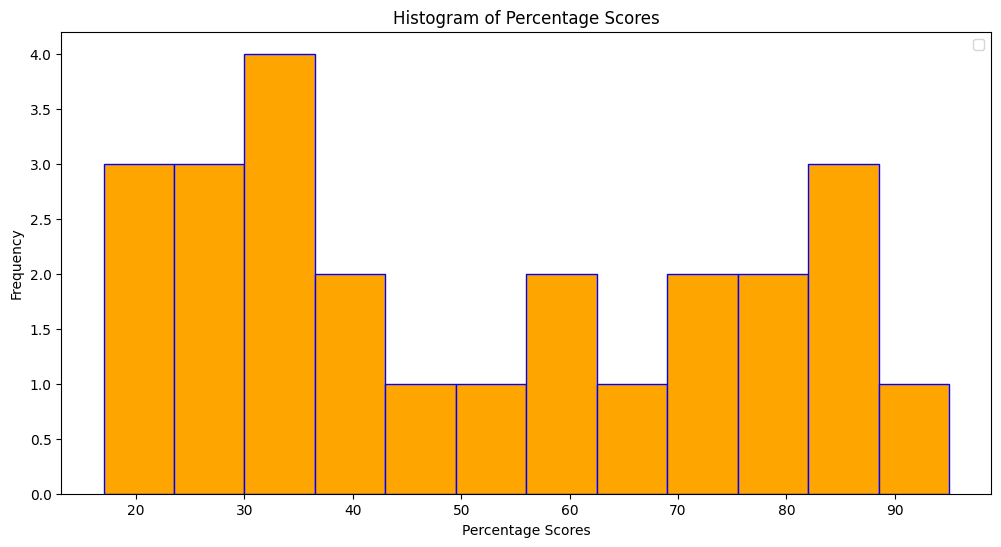

In [8]:
# Create a histogram of percentage Scores

plt.figure(figsize=(12,6))
plt.hist(df['Scores'],bins=12,color='orange',edgecolor='blue')
plt.title("Histogram of Percentage Scores")
plt.xlabel("Percentage Scores")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Text(0.5, 0, 'Percentage Scores')

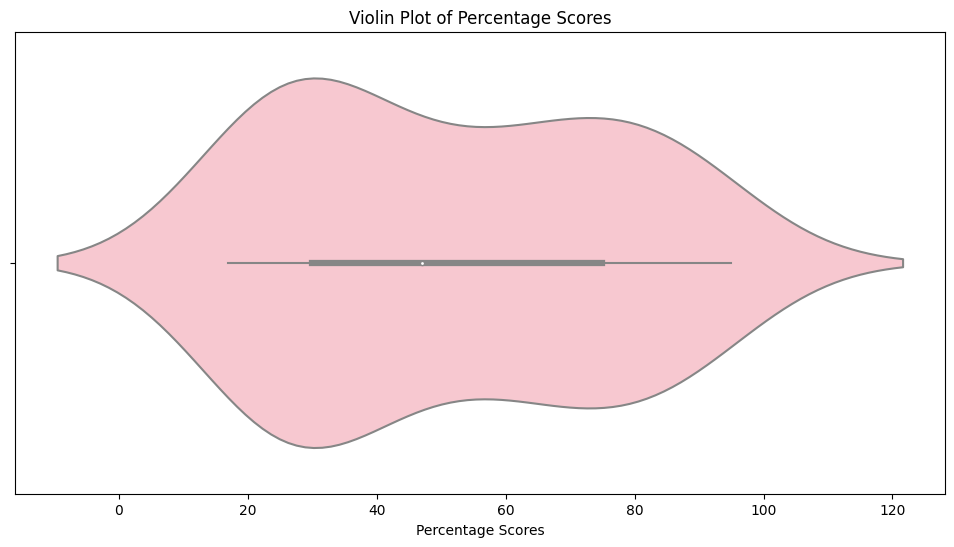

In [9]:
# create a violin plot of Percentage Scores
plt.figure(figsize=(12,6))
sns.violinplot(x='Scores',style='event' ,data=df,color='pink')
plt.title("Violin Plot of Percentage Scores")
plt.xlabel('Percentage Scores')

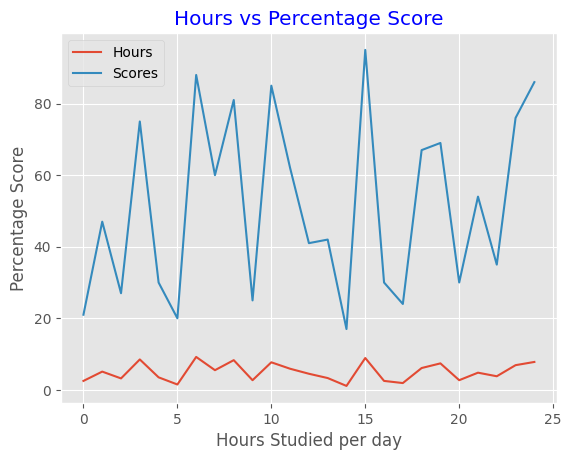

In [10]:
# Plotting the dataset

plt.style.use('ggplot')
df.plot(kind='line')
plt.title("Hours vs Percentage Score", color='blue')
plt.xlabel('Hours Studied per day')
plt.ylabel('Percentage Score')
plt.show()



**From the graphs, we can see a positive relationship between the percentage scores and hours of study.**

# **Model Training**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = df.iloc[:, :-1].values #Independent variable(Hours)
y = df.iloc[:, 1].values #Dependent variable(Scores)

In [12]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# **Model Selection**

In [13]:
# Model training
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


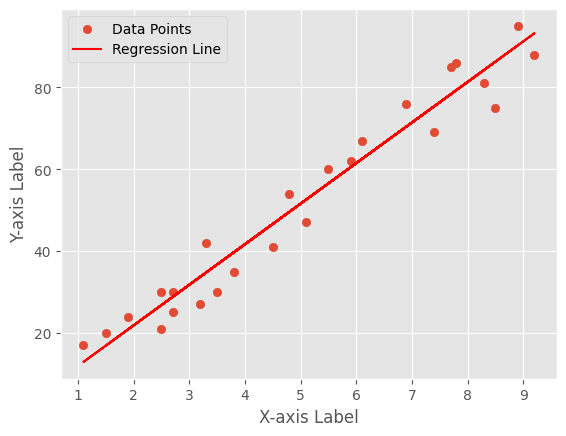

In [14]:


# Scatter plot for the data points
plt.scatter(X, y, label='Data Points')

# Plotting the regression line using the model's predictions
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')

# Labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()

# Display the plot
plt.show()


# **Making Predictions**

In [15]:
#predicting the scores
y_pred = regressor.predict(x_test)

In [16]:
#comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
#Manual test. test with your own data

hours = 9.25
predicted = regressor.predict([[hours]])
print("Number of hours =", hours)
print("Predicted score is =", predicted[0])

Number of hours = 9.25
Predicted score is = 93.69173248737539


# **Evaluating the model**

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-Squared',metrics.r2_score(y_test,y_pred))



Mean Absolute Error: 4.183859899002982
RMSE: 4.647447612100373
R-Squared 0.9454906892105354
